In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import zipfile

In [2]:
!kaggle datasets download -d purusinghvi/email-spam-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset
License(s): MIT
 86% 37.0M/43.0M [00:00<00:00, 74.4MB/s]
100% 43.0M/43.0M [00:00<00:00, 85.6MB/s]


In [5]:
def unzipper(file):
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall()

unzipper('/content/email-spam-classification-dataset.zip')

In [6]:
df = pd.read_csv('/content/combined_data.csv')
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [8]:
x = df['text']
y = df['label']

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
x = vectorizer.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

def classification_reports(y_test, y_pred):
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'Precision: {precision_score(y_test, y_pred):.2f}')
    print(f'Recall: {recall_score(y_test, y_pred):.2f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="viridis")
    plt.show()

Accuracy: 0.98
Precision: 0.99
Recall: 0.96
F1 Score: 0.98


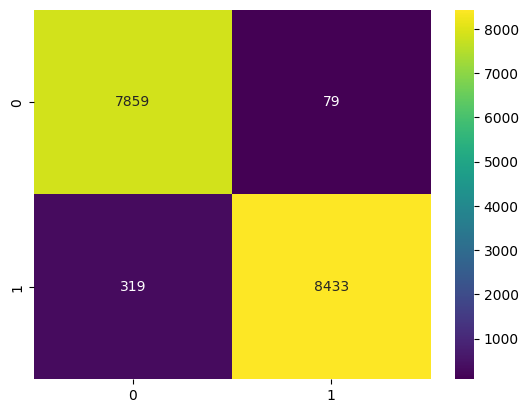

In [21]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
classification_reports(y_test, y_pred)

In [23]:
def spam_check(email):
    email = vectorizer.transform([email])
    result = model.predict(email)
    if result == 1:
        print('Spam')
    else:
        print('Not Spam')

In [24]:
test = "wulvob get your medircations online qnb ikud"
spam_check(test)

Spam


In [25]:
import joblib

def save_weights(model, path):
    joblib.dump(model, path)

In [27]:
save_weights(model, 'email_spam_model.pkl')

In [28]:
save_weights(vectorizer, 'email_spam_tfidf-vectorizer.pkl')